In [2]:
import numpy as np, matplotlib.pyplot as plt, random, time, datetime
from functools import lru_cache
from pyquil import Program, get_qc
from pyquil.gates import *
import os, sys
from pyquil.quilatom import quil_sin, quil_cos, Parameter
from pyquil.quilbase import DefGate
from pyquil.latex import display, to_latex
# import Peres_helpers as hf
import pickle
from collections import Counter
from scipy.optimize import curve_fit as cf
sys.path.append('binomial_cython')
from binomial import binomial_dist

def fit_F(x, m, c):
    return m*x + c

In [3]:
with open('results_aspen_theory_noisy_aspen9_errors.pkl', 'rb') as file:
    select_states = pickle.load(file)

In [19]:
file_prefix = f'results_aspen_theory_noisy_aspen9_errors_{datetime.date.today()}_'

def plot_gs(select_states, gamma, file_prefix):
    fth = np.array([select_states[i]['Gammas_theory'][gamma] for i in range(len(select_states))])
    errth = np.array([select_states[i]['cfs_theory'][gamma] for i in range(len(select_states))])

    f2q = [select_states[i]['Gamma_2q-qvm'][gamma] for i in range(len(select_states))]

    fas = np.array([select_states[i]['Gamma_Aspen'][gamma] for i in range(len(select_states))])
    erras = np.array([select_states[i]['cfs_Aspen'][gamma] for i in range(len(select_states))])

    fnq = np.array([select_states[i]['Gamma_deph-qvm'][gamma] for i in range(len(select_states))])
#     errnq = np.array([select_states[i]['cfs_deph-qvm'][gamma] for i in range(len(select_states))])


    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.sans-serif": ["Helvetica"]})
    fig = plt.figure(figsize=(15,5))
    # plt.subplot(2,2,4)
#     plt.errorbar(range(len(fnq)), fnq, yerr=[fnq - errnq[:,0], errnq[:,1] - fnq], ls='', marker = 'D', capsize=6, color='maroon', alpha=1, lw=1, label='Noisy-QVM')
#     plt.errorbar(range(len(fas)), fas, yerr=[fas - erras[:,0], erras[:,1] - fas], ls='', marker = 'o', capsize=6, color='darkgreen', alpha=1, lw=1, label='Aspen-9')
    plt.errorbar(range(len(fth)), fth, yerr=[fth - errth[:,0], errth[:,1] - fth], ls='', marker = '', capsize=6, color='blue', alpha=1, lw=1, label='Statistical error-bar')
    plt.plot(f2q, '*', color='blue', label='Ideal QVM')
    plt.plot(fas, 'o', color='darkgreen', label='Aspen-9')
    plt.errorbar(range(len(fnq)), fnq, yerr=[fth - errth[:,0], errth[:,1] - fth], ls='', marker = 'D', capsize=6, color='maroon', alpha=1, lw=1, label='Noisy-QVM')
    plt.xticks(range(len(select_states)))
    plt.axhline(y=-1, ls='dashed')
    plt.axhline(y=1, ls='dashed')


    x = np.arange(len(fas))
    if gamma == 'F':
        popt, pcov = cf(fit_F, x, fas)
        plt.plot(x, fit_F(x, *popt), ls='dashed', color='darkgreen', alpha=0.6, lw=4, label='Fit to Aspen-9 result')

        popt, pcov = cf(fit_F, x, fnq)
        plt.plot(x, fit_F(x, *popt), ls='dashed', color='maroon', alpha=1, label='Fit to Noisy-QVM result')

    plt.xlabel('Iterations', size=20)
    ylabs = {'a': '$\gamma{12}$', 'b': '$\gamma{23}$', 'c': '$\gamma{31}$', 'F': '$F$'}
    plt.ylabel(ylabs[gamma], size=20)
    plt.xticks(size=16)
    if gamma == 'F':
        plt.yticks([-int(1), 0 , fit_F(0, *popt), 1], size=16)
    else:
        plt.yticks([-1,0,1],size=16)
    
    lgd = plt.legend(fontsize = 15, bbox_to_anchor=(1,1))

    plt.savefig(f'{file_prefix}{gamma}.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
    
#     plt.legend(fontsize = 20, bbox_to_anchor=(1,1))

    plt.show()

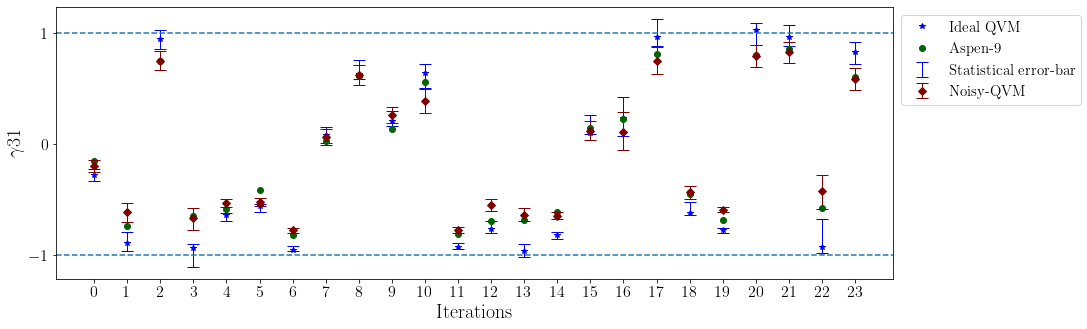

In [24]:
plot_gs(select_states, 'c', file_prefix)

In [76]:
qc = get_qc('Aspen-9', as_qvm=True)

In [88]:
qc.device.get_isa().qubits[10].gates

[MeasureInfo(operator='MEASURE', qubit=12, target='_', duration=2000, fidelity=0.976),
 MeasureInfo(operator='MEASURE', qubit=12, target=None, duration=2000, fidelity=0.976),
 GateInfo(operator='RZ', parameters=['_'], arguments=[12], duration=0.01, fidelity=1.0),
 GateInfo(operator='RX', parameters=[0.0], arguments=[12], duration=50, fidelity=1.0),
 GateInfo(operator='RX', parameters=[3.141592653589793], arguments=[12], duration=50, fidelity=0.9987920996598936),
 GateInfo(operator='RX', parameters=[-3.141592653589793], arguments=[12], duration=50, fidelity=0.9987920996598936),
 GateInfo(operator='RX', parameters=[1.5707963267948966], arguments=[12], duration=50, fidelity=0.9987920996598936),
 GateInfo(operator='RX', parameters=[-1.5707963267948966], arguments=[12], duration=50, fidelity=0.9987920996598936)]

In [91]:
qc.device.get_isa().qubits[21].gates

[MeasureInfo(operator='MEASURE', qubit=25, target='_', duration=2000, fidelity=0.98),
 MeasureInfo(operator='MEASURE', qubit=25, target=None, duration=2000, fidelity=0.98),
 GateInfo(operator='RZ', parameters=['_'], arguments=[25], duration=0.01, fidelity=1.0),
 GateInfo(operator='RX', parameters=[0.0], arguments=[25], duration=50, fidelity=1.0),
 GateInfo(operator='RX', parameters=[3.141592653589793], arguments=[25], duration=50, fidelity=0.9991884500270085),
 GateInfo(operator='RX', parameters=[-3.141592653589793], arguments=[25], duration=50, fidelity=0.9991884500270085),
 GateInfo(operator='RX', parameters=[1.5707963267948966], arguments=[25], duration=50, fidelity=0.9991884500270085),
 GateInfo(operator='RX', parameters=[-1.5707963267948966], arguments=[25], duration=50, fidelity=0.9991884500270085)]

In [108]:
qc.device.get_isa().edges[15].gates

[GateInfo(operator='CZ', parameters=[], arguments=['_', '_'], duration=200, fidelity=0.9832465734702871),
 GateInfo(operator='XY', parameters=['theta'], arguments=['_', '_'], duration=200, fidelity=0.9691462506471074)]

In [109]:
qc.device.get_isa().qubits[10]

Qubit(id=12, type=None, dead=False, gates=[MeasureInfo(operator='MEASURE', qubit=12, target='_', duration=2000, fidelity=0.976), MeasureInfo(operator='MEASURE', qubit=12, target=None, duration=2000, fidelity=0.976), GateInfo(operator='RZ', parameters=['_'], arguments=[12], duration=0.01, fidelity=1.0), GateInfo(operator='RX', parameters=[0.0], arguments=[12], duration=50, fidelity=1.0), GateInfo(operator='RX', parameters=[3.141592653589793], arguments=[12], duration=50, fidelity=0.9987920996598936), GateInfo(operator='RX', parameters=[-3.141592653589793], arguments=[12], duration=50, fidelity=0.9987920996598936), GateInfo(operator='RX', parameters=[1.5707963267948966], arguments=[12], duration=50, fidelity=0.9987920996598936), GateInfo(operator='RX', parameters=[-1.5707963267948966], arguments=[12], duration=50, fidelity=0.9987920996598936)])

In [113]:
t1s = np.logspace(-6, -5, num=3)
thetas = np.linspace(-np.pi, np.pi, num=20)
# t1s * 1e6 # us
t1s

array([1.00000000e-06, 3.16227766e-06, 1.00000000e-05])

In [114]:
qc

QuantumComputer[name="Aspen-9-qvm"]

In [183]:
qc = qvm('1q-qvm')

NameError: name 'qvm' is not defined

In [378]:
qc = get_qc('2q-qvm')

In [143]:
qc.qam.gate_noise = [0.2,0,0]

In [144]:
qc

QuantumComputer[name="2q-noisy-qvm"]

In [145]:
qc.qam.gate_noise

[0.2, 0, 0]

In [148]:
?pyquil.noise.get_noisy_gate

Signature:
pyquil.noise.get_noisy_gate(
    gate_name: str,
    params: Iterable[Union[ForwardRef('Expression'), ForwardRef('MemoryReference'), numpy.int64, int, float, complex]],
) -> Tuple[numpy.ndarray, str]
Docstring:
Look up the numerical gate representation and a proposed 'noisy' name.

:param gate_name: The Quil gate name
:param params: The gate parameters.
:return: A tuple (matrix, noisy_name) with the representation of the ideal gate matrix
    and a proposed name for the noisy version.
File:      /opt/conda/lib/python3.8/site-packages/pyquil/noise.py
Type:      function


In [178]:
pyquil.noise.get_noisy_gate(gate_name='RX', params=[np.pi/2])

(array([[ 0.70710678+0.j        , -0.        -0.70710678j],
        [-0.        -0.70710678j,  0.70710678+0.j        ]]),
 'NOISY-RX-PLUS-90')

In [227]:
circ = Program(I(0), RX(np.pi/4, 12))

In [228]:
noise_model = pyquil.noise._decoherence_noise_model([RX(np.pi/2, 12)], T1=3e-05, T2=3e-05, gate_time_1q=5e-08, gate_time_2q=1.5e-07, ro_fidelity=0.976)

In [196]:
RX(np.pi, 0)

<Gate RX(pi) 0>

In [199]:
?pyquil.noise._decoherence_noise_model

Signature:
pyquil.noise._decoherence_noise_model(
    gates: Sequence[pyquil.quilbase.Gate],
    T1: Union[Dict[int, float], float] = 3e-05,
    T2: Union[Dict[int, float], float] = 3e-05,
    gate_time_1q: float = 5e-08,
    gate_time_2q: float = 1.5e-07,
    ro_fidelity: Union[Dict[int, float], float] = 0.95,
) -> pyquil.noise.NoiseModel
Docstring:
The default noise parameters

- T1 = 30 us
- T2 = 30 us
- 1q gate time = 50 ns
- 2q gate time = 150 ns

are currently typical for near-term devices.

This function will define new gates and add Kraus noise to these gates. It will translate
the input program to use the noisy version of the gates.

:param gates: The gates to provide the noise model for.
:param T1: The T1 amplitude damping time either globally or in a
    dictionary indexed by qubit id. By default, this is 30 us.
:param T2: The T2 dephasing time either globally or in a
    dictionary indexed by qubit id. By default, this is also 30 us.
:param gate_time_1q: The duration of the

In [221]:
print(circ)

I 0
RX(pi/4) 12



In [1]:
qc = get_qc('aspen-9', noisy=True)

NameError: name 'get_qc' is not defined

In [234]:
exe = qc.compile(circ)

In [235]:
exe.program

'RZ(pi/2) 0\nRX(pi/2) 0\nRZ(pi/4) 0\nRX(-pi/2) 0\nRZ(-pi/2) 0\n'

In [229]:
noise_model

NoiseModel(gates=[KrausModel(gate='RX', params=(1.5707963267948966,), targets=(12,), kraus_ops=[array([[0.70695951+0.j        , 0.        -0.70695951j],
       [0.        -0.70637063j, 0.70637063+0.j        ]]), array([[ 0.01443075+0.j        ,  0.        -0.01443075j],
       [ 0.        +0.01441873j, -0.01441873+0.j        ]]), array([[0.        -0.02884948j, 0.02884948+0.j        ],
       [0.        +0.j        , 0.        +0.j        ]]), array([[ 0.        +0.00058889j, -0.00058889+0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ]])], fidelity=1.0)], assignment_probs={12: array([[0.976, 0.024],
       [0.024, 0.976]])})

In [232]:
?qc

Type:           QuantumComputer
String form:    2q-noisy-qvm
File:           /opt/conda/lib/python3.8/site-packages/pyquil/api/_quantum_computer.py
Docstring:      <no docstring>
Init docstring:
A quantum computer for running quantum programs.

A quantum computer has various characteristics like supported gates, qubits, qubit
topologies, gate fidelities, and more. A quantum computer also has the ability to
run quantum programs.

A quantum computer can be a real Rigetti QPU that uses superconducting transmon
qubits to run quantum programs, or it can be an emulator like the Rigetti QVM with
noise models and mimicked topologies.

:param name: A string identifying this particular quantum computer.
:param qam: A quantum abstract machine which handles executing quantum programs. This
    dispatches to a QVM or QPU.
:param device: A collection of connected qubits and associated specs and topology.
:param symmetrize_readout: Whether to apply readout error symmetrization. See
    :py:func:`run_

In [380]:
circ = Program(I(12), RX(np.pi/7, 12), CZ(12, 25))
circ = qc.compiler.quil_to_native_quil(circ)
circ = add_decoherence_noise([RX(np.pi, 12), CZ(12, 25)], ro_fidelity=0.976)

In [381]:
from pyquil.noise import add_decoherence_noise

In [382]:
print(circ)

DEFGATE NOISY-CZ:
    1, 0, 0, 0
    0, 1, 0, 0
    0, 0, 1, 0
    0, 0, 0, -1

DEFGATE NOISY-RX-PLUS-180:
    0.0, -i
    -i, 0.0

PRAGMA ADD-KRAUS NOISY-CZ 12 25 "(0.9987515611987302 0.0 0.0 0.0 0.0 0.9962578007950712 0.0 0.0 0.0 0.0 0.9962578007950712 0.0 0.0 0.0 0.0 -0.9937702670059103)"
PRAGMA ADD-KRAUS NOISY-CZ 12 25 "(0.03531119088659347 0.0 0.0 0.0 0.0 -0.03522302316494972 0.0 0.0 0.0 0.0 0.03522302316494972 0.0 0.0 0.0 0.0 0.03513507558731541)"
PRAGMA ADD-KRAUS NOISY-CZ 12 25 "(0.0 0.0705342140515426 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 -0.07035809875226455 0.0 0.0 0.0 0.0)"
PRAGMA ADD-KRAUS NOISY-CZ 12 25 "(0.0 -0.0024937604036588622 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0024875337891608652 0.0 0.0 0.0 0.0)"
PRAGMA ADD-KRAUS NOISY-CZ 12 25 "(0.03531119088659347 0.0 0.0 0.0 0.0 0.03522302316494972 0.0 0.0 0.0 0.0 -0.03522302316494972 0.0 0.0 0.0 0.0 0.03513507558731541)"
PRAGMA ADD-KRAUS NOISY-CZ 12 25 "(0.0012484388012699579 0.0 0.0 0.0 0.0 -0.001245321602388925 0.0 0.0 0.0 0.

In [279]:
exe = qc.compile(circ)

In [280]:
print(exe.program)

PRAGMA ADD-KRAUS NOISY-CZ 0 1 "(0.9987515611987302 0.0 0.0 0.0 0.0 0.9962578007950712 0.0 0.0 0.0 0.0 0.9962578007950712 0.0 0.0 0.0 0.0 -0.9937702670059103)"
PRAGMA ADD-KRAUS NOISY-CZ 0 1 "(0.03531119088659347 0.0 0.0 0.0 0.0 -0.03522302316494972 0.0 0.0 0.0 0.0 0.03522302316494972 0.0 0.0 0.0 0.0 0.03513507558731541)"
PRAGMA ADD-KRAUS NOISY-CZ 0 1 "(0.0 0.0705342140515426 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 -0.07035809875226455 0.0 0.0 0.0 0.0)"
PRAGMA ADD-KRAUS NOISY-CZ 0 1 "(0.0 -0.0024937604036588622 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0024875337891608652 0.0 0.0 0.0 0.0)"
PRAGMA ADD-KRAUS NOISY-CZ 0 1 "(0.03531119088659347 0.0 0.0 0.0 0.0 0.03522302316494972 0.0 0.0 0.0 0.0 -0.03522302316494972 0.0 0.0 0.0 0.0 0.03513507558731541)"
PRAGMA ADD-KRAUS NOISY-CZ 0 1 "(0.0012484388012699579 0.0 0.0 0.0 0.0 -0.001245321602388925 0.0 0.0 0.0 0.0 -0.001245321602388925 0.0 0.0 0.0 0.0 -0.0012422121867719609)"
PRAGMA ADD-KRAUS NOISY-CZ 0 1 "(0.0 0.0024937604036588622 0.0 0.0 0.0 0.0 0.0 0

In [383]:
circ = Program(H(12), CNOT(12, 25))

In [384]:
c = circ.declare('ro', 'BIT', 2)

In [385]:
circ += MEASURE(12, c[0])
circ += MEASURE(25, c[1])

In [386]:
print(circ)

H 12
CNOT 12 25
DECLARE ro BIT[2]
MEASURE 12 ro[0]
MEASURE 25 ro[1]



In [393]:
qc = get_qc('2q-qvm')

In [394]:
circ_n = qc.compiler.quil_to_native_quil(circ)

In [395]:
print(circ_n)

DECLARE ro BIT[2]
RZ(pi/2) 0
RX(-pi/2) 0
RZ(-pi/2) 1
RX(-pi/2) 1
CZ 0 1
RX(pi/2) 0
RZ(-pi/2) 0
RZ(pi/2) 1
MEASURE 0 ro[1]
MEASURE 1 ro[0]



In [396]:
t1s = np.arange(3e-5, 3e-3, 1e-4)
data = []
for i in range(10):
    t1=3
    noisy_circ = add_decoherence_noise(circ_n, ro_fidelity={0: 0.976, 1: 0.98})
    noisy_circ.wrap_in_numshots_loop(2000)
    exe = qc.compile(noisy_circ)
    res = qc.run(exe)
    data.append([t1, Counter([''.join(list(map(str, elem))) for elem in res])['11']/2000])

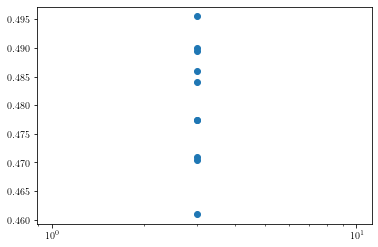

In [397]:
data = np.array(data)

plt.plot(data[:,0], data[:,1], 'o')
plt.xscale('log')

In [356]:
t1s

array([3.0e-05, 4.0e-05, 5.0e-05, 6.0e-05, 7.0e-05, 8.0e-05, 9.0e-05,
       1.0e-04, 1.1e-04, 1.2e-04, 1.3e-04, 1.4e-04, 1.5e-04, 1.6e-04,
       1.7e-04, 1.8e-04, 1.9e-04, 2.0e-04, 2.1e-04, 2.2e-04, 2.3e-04,
       2.4e-04, 2.5e-04, 2.6e-04, 2.7e-04, 2.8e-04, 2.9e-04])

In [351]:
Counter([''.join(list(map(str, elem))) for elem in res])

Counter({'11': 489, '00': 460, '10': 25, '01': 26})

In [352]:
print(noisy_circ)

DEFGATE NOISY-CZ:
    1, 0, 0, 0
    0, 1, 0, 0
    0, 0, 1, 0
    0, 0, 0, -1

DEFGATE NOISY-RX-MINUS-90:
    0.7071067811865475, 0.7071067811865475i
    0.7071067811865475i, 0.7071067811865475

DEFGATE NOISY-RX-PLUS-90:
    0.7071067811865475, -0.7071067811865475i
    -0.7071067811865475i, 0.7071067811865475

PRAGMA ADD-KRAUS NOISY-CZ 0 1 "(0.9987515611987302 0.0 0.0 0.0 0.0 0.9962578007950712 0.0 0.0 0.0 0.0 0.9962578007950712 0.0 0.0 0.0 0.0 -0.9937702670059103)"
PRAGMA ADD-KRAUS NOISY-CZ 0 1 "(0.03531119088659347 0.0 0.0 0.0 0.0 -0.03522302316494972 0.0 0.0 0.0 0.0 0.03522302316494972 0.0 0.0 0.0 0.0 0.03513507558731541)"
PRAGMA ADD-KRAUS NOISY-CZ 0 1 "(0.0 0.0705342140515426 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 -0.07035809875226455 0.0 0.0 0.0 0.0)"
PRAGMA ADD-KRAUS NOISY-CZ 0 1 "(0.0 -0.0024937604036588622 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0024875337891608652 0.0 0.0 0.0 0.0)"
PRAGMA ADD-KRAUS NOISY-CZ 0 1 "(0.03531119088659347 0.0 0.0 0.0 0.0 0.03522302316494972 0.0 0.0 0.0 

In [324]:
?add_decoherence_noise

Signature:
add_decoherence_noise(
    prog: 'Program',
    T1: Union[Dict[int, float], float] = 3e-05,
    T2: Union[Dict[int, float], float] = 3e-05,
    gate_time_1q: float = 5e-08,
    gate_time_2q: float = 1.5e-07,
    ro_fidelity: Union[Dict[int, float], float] = 0.95,
) -> 'Program'
Docstring:
Add generic damping and dephasing noise to a program.

This high-level function is provided as a convenience to investigate the effects of a
generic noise model on a program. For more fine-grained control, please investigate
the other methods available in the ``pyquil.noise`` module.

In an attempt to closely model the QPU, noisy versions of RX(+-pi/2) and CZ are provided;
I and parametric RZ are noiseless, and other gates are not allowed. To use this function,
you need to compile your program to this native gate set.

The default noise parameters

- T1 = 30 us
- T2 = 30 us
- 1q gate time = 50 ns
- 2q gate time = 150 ns

are currently typical for near-term devices.

This function will defin

In [400]:
t2 = lambda p: -150*1e-9 / np.log(1-2*p)

In [405]:
t2(0.0167)

4.415593340744047e-06

In [6]:
qc = get_qc('Aspen-9')

In [7]:
qc

QuantumComputer[name="Aspen-9"]

In [15]:
qc.device.get_isa().qubits[10].gates

[MeasureInfo(operator='MEASURE', qubit=12, target='_', duration=2000, fidelity=0.968),
 MeasureInfo(operator='MEASURE', qubit=12, target=None, duration=2000, fidelity=0.968),
 GateInfo(operator='RZ', parameters=['_'], arguments=[12], duration=0.01, fidelity=1.0),
 GateInfo(operator='RX', parameters=[0.0], arguments=[12], duration=50, fidelity=1.0),
 GateInfo(operator='RX', parameters=[3.141592653589793], arguments=[12], duration=50, fidelity=0.9987920996598936),
 GateInfo(operator='RX', parameters=[-3.141592653589793], arguments=[12], duration=50, fidelity=0.9987920996598936),
 GateInfo(operator='RX', parameters=[1.5707963267948966], arguments=[12], duration=50, fidelity=0.9987920996598936),
 GateInfo(operator='RX', parameters=[-1.5707963267948966], arguments=[12], duration=50, fidelity=0.9987920996598936)]

In [16]:
qc.device.get_isa().qubits[21].gates

[MeasureInfo(operator='MEASURE', qubit=25, target='_', duration=2000, fidelity=0.9610000000000001),
 MeasureInfo(operator='MEASURE', qubit=25, target=None, duration=2000, fidelity=0.9610000000000001),
 GateInfo(operator='RZ', parameters=['_'], arguments=[25], duration=0.01, fidelity=1.0),
 GateInfo(operator='RX', parameters=[0.0], arguments=[25], duration=50, fidelity=1.0),
 GateInfo(operator='RX', parameters=[3.141592653589793], arguments=[25], duration=50, fidelity=0.9991884500270085),
 GateInfo(operator='RX', parameters=[-3.141592653589793], arguments=[25], duration=50, fidelity=0.9991884500270085),
 GateInfo(operator='RX', parameters=[1.5707963267948966], arguments=[25], duration=50, fidelity=0.9991884500270085),
 GateInfo(operator='RX', parameters=[-1.5707963267948966], arguments=[25], duration=50, fidelity=0.9991884500270085)]

In [18]:
qc.device.get_isa().edges[15].gates

[GateInfo(operator='CZ', parameters=[], arguments=['_', '_'], duration=200, fidelity=0.9820553488690702),
 GateInfo(operator='XY', parameters=['theta'], arguments=['_', '_'], duration=200, fidelity=0.9671916651500534)]

In [3]:
from pyquil import get_qc
import time

In [24]:
qc = get_qc("Aspen-9")

In [25]:
details = qc.device.get_isa()

# Finding good qubits and edges

In [34]:
def get_good_qbits(cz_fid, meas_fid):
    qc = get_qc('Aspen-9')
    details = qc.device.get_isa()

    good_edges = []
    for edge in details.edges:
        gates = edge.gates
        for gate in gates:
            if gate.operator == 'CZ':
                try:
                    if gate.fidelity > 0.98:
                        good_edges.append({'Edge': edge.targets, 'CZ fidelity': gate.fidelity, 'index': details.edges.index(edge)})
                except TypeError:
                    print('Gate fidelity not defined')

    for edge in good_edges[:]:
        q1, q2 = edge['Edge']
        for q in details.qubits:
            if q.id in [q1,q2]:
                gates = q.gates
                for gate in gates:
                    if gate.operator == 'MEASURE':
                        if gate.fidelity < 0.96:
                            try:
                                good_edges.remove(edge)
                            except ValueError:
                                print('Edge already removed')

    print(good_edges)

In [35]:
get_good_qbits()
print('______________________')

Gate fidelity not defined
Edge already removed
Edge already removed
Edge already removed
[]
______________________


In [171]:
for e in a[:]:
    if e in [2,3]:
        a.remove(e)

In [172]:
a

[0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [152]:
a.remove(9)

In [153]:
a

[4, 5, 6, 7, 8, 10, 11, 12]

In [165]:
details.qubits

[Qubit(id=0, type=None, dead=False, gates=[MeasureInfo(operator='MEASURE', qubit=0, target='_', duration=2000, fidelity=0.971), MeasureInfo(operator='MEASURE', qubit=0, target=None, duration=2000, fidelity=0.971), GateInfo(operator='RZ', parameters=['_'], arguments=[0], duration=0.01, fidelity=1.0), GateInfo(operator='RX', parameters=[0.0], arguments=[0], duration=50, fidelity=1.0), GateInfo(operator='RX', parameters=[3.141592653589793], arguments=[0], duration=50, fidelity=0.9990014768242277), GateInfo(operator='RX', parameters=[-3.141592653589793], arguments=[0], duration=50, fidelity=0.9990014768242277), GateInfo(operator='RX', parameters=[1.5707963267948966], arguments=[0], duration=50, fidelity=0.9990014768242277), GateInfo(operator='RX', parameters=[-1.5707963267948966], arguments=[0], duration=50, fidelity=0.9990014768242277)]),
 Qubit(id=1, type=None, dead=False, gates=[MeasureInfo(operator='MEASURE', qubit=1, target='_', duration=2000, fidelity=0.949), MeasureInfo(operator='ME